In [1]:
# !pip install ipywidgets

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import pandas as pd
from IPython.display import clear_output, display
from ipywidgets import interact
from time import sleep

https://databasecamp.de/ki/gradientenverfahren-ein-steiler-abstieg?paged312=3#was-ist-die-grundidee-von-gradient-descent

# Der Gradient – Was ist das eigentlich?


Stell dir eine Landschaft vor, die Hügel und Täler hat. Du stehst irgendwo auf dieser Landschaft und möchtest ins tiefste Tal (das Minimum der Zielfunktion).

Der **Gradient** ist wie ein Kompass, der dir zeigt:
- **In welche Richtung** die Landschaft am steilsten ansteigt (der steilste Bergaufweg).
- **Wie steil** dieser Anstieg ist.

Um ins Tal zu gelangen, gehst du in die **entgegengesetzte Richtung des Gradienten** – das ist der steilste Weg nach unten.

## Anschauliche Bedeutung des Gradienten

### Einfach gesagt:
- Der Gradient ist wie ein **"Gefälle-Messer"**. Er misst die Steigung der Zielfunktion in Bezug auf eine oder mehrere Variablen.
- **Wenn der Gradient groß ist**, bedeutet das, dass die Steigung steil ist.
- **Wenn der Gradient klein ist**, ist die Steigung flach – das bedeutet, du bist nahe am Minimum.

### Mathematisch:
- Der Gradient ist ein **Vektor**, der die Richtung des stärksten Anstiegs einer Funktion zeigt.
- Wenn die Zielfunktion $J(m, b)$ von zwei Variablen ($m$) und ($b$)) abhängt, gibt der Gradient die Richtung an, in die sich $J$ am stärksten verändert:
  $$
  \nabla J(m, b) = \left( \frac{\partial J}{\partial m}, \frac{\partial J}{\partial b} \right)
  $$



## Beispiel mit einer Steigung

- Stelle dir eine **Bergkuppe** vor. Wenn du dort stehst, spürst du, dass es in eine bestimmte Richtung steil bergab geht (das ist der negative Gradient).
- Der Gradient zeigt aber immer **nach oben**, in Richtung des steilsten Anstiegs.



## Gradient in der linearen Regression

In der linearen Regression möchten wir die Parameter $m$ (Steigung) und $b$ (Achsenabschnitt) so optimieren, dass der Fehler (Zielfunktion) minimiert wird. Der Gradient hilft uns dabei:

1. **Richtung und Veränderung:**
   - Er zeigt uns, wie sich der Fehler $J(m, b)$ verändert, wenn wir $m$ oder $b$ leicht anpassen.
   - Er gibt die Richtung an, in die wir die Parameter anpassen sollten, um $J(m, b)$ kleiner zu machen.

2. **Beispiel für $m$:**
   - Wenn der Gradient für $m$ positiv ist ($\frac{\partial J}{\partial m} > 0$):
     - Das bedeutet, dass der Fehler größer wird, wenn wir $m$ erhöhen.
     - Daher verringern wir $m$, um den Fehler zu minimieren.

3. **Beispiel für $b$:**
   - Wenn der Gradient für $b$ negativ ist ($\frac{\partial J}{\partial b} < 0$):
     - Das bedeutet, dass der Fehler kleiner wird, wenn wir $b$ erhöhen.
     - Daher erhöhen wir $b$, um den Fehler zu minimieren.
```

### Ziel- bzw. Verlustfunktion
Die Zielfunktion misst die Qualität des Modells, indem sie die Abweichung zwischen den tatsächlichen Werten
und den vorhergesagten Werten berechnet. Dies erfolgt über die Summe der kleinsten Quadrate, die auch als Mean Squared Error (MSE) bezeichnet wird.

Eigenschaften der Zielfunktion:
 - Differenzierbar:
    Die Zielfunktion ist glatt und stetig, was bedeutet, dass wir ihre Ableitungen berechnen können. Dies ist eine wichtige Voraussetzung für den Gradientenabstieg.

- Konvex:
    Da die Zielfunktion quadratisch ist, besitzt sie genau ein globales Minimum. Das garantiert, dass der Gradientenabstieg immer den besten Wert findet, wenn die Lernrate korrekt gewählt ist.

- Bewertung der Modellqualität:
    Die Zielfunktion misst präzise, wie gut das Modell die Daten beschreibt. Ein niedriger Wert bedeutet, dass die Abweichungen zwischen den Vorhersagen und den tatsächlichen Werten gering sind.

- Ziel des Gradientenverfahrens:
    Das Ziel des Gradientenabstiegs ist es, die Zielfunktion zu minimieren. Das bedeutet:

    Wir passen die Modellparameter so an, dass die Zielfunktion ihren kleinsten Wert erreicht.
    An diesem Punkt sind die Abstände zwischen den Vorhersagen und den tatsächlichen Werten minimal, und unser Modell beschreibt die Daten optimal.

Da die Zielfunktion quadratisch ist, hat sie die Form einer umgedrehten "Schüssel". Das globale Minimum ist der tiefste Punkt dieser Schüssel. Der Gradientenabstieg hilft uns, diesen Punkt zu finden, indem er die Steigung der Funktion (den "Gradienten") verwendet, um die Parameter schrittweise zu optimieren.

In [3]:
def compute_cost(intercept, coef, x, y):
    total_cost = 0
    N = len(x)
    for i in range(N):
        total_cost += (y[i] - (coef * x[i] + intercept)) ** 2
    return total_cost / N

#### Grafische Darstellung einer quadratischen Funktion 
**Bei Darstellungsfehlern Code Zelle nochmal ausführen !**

In [11]:
x = np.linspace(-10, 10, 100)

def f(x, A, B, C):
    return A * x**2 + B * x + C

def f_derivative(x, A, B):
    return 2 * A * x + B

def update(A=1, B=0, C=0):
    
    ax.clear()
    y = f(x, A, B, C)
    ax.plot(x, y, label=f"$f(x) = {A:.2f}\\times x^2 + {B:.2f}x + {C:.2f}$")

    if A != 0:
        # Berechne Extrempunkt
        x_extreme = -B / (2 * A)
        y_extreme = f(x_extreme, A, B, C)
        tangent_slope = f_derivative(x_extreme, A, B)
        tangent = tangent_slope * (x - x_extreme) + y_extreme

        # Plot Extrempunkt und Tangente
        ax.plot(x_extreme, y_extreme, 'ro', label=f"Extrempunkt ({x_extreme:.2f}, {y_extreme:.2f})")
        ax.plot(x, tangent, 'g--', label="Tangente am Extrempunkt")
    
    
    ax.axhline(color="gray", linestyle="--", alpha=.25)
    ax.axvline(color="gray", linestyle="--", alpha=.25)

    ax.set_title("Interaktives Diagramm mit Extrempunkt und Tangente")
    ax.set_ylim(-25, 25)
    ax.set_xlim(-5, 5)
    ax.set_xlabel("x")
    ax.set_ylabel("f(x)")
    ax.legend(loc='upper left', bbox_to_anchor=(1, 0.5))

    clear_output(wait=True)
    display(fig)
    plt.close(fig)

# Interaktives Widget erstellen
fig, ax = plt.subplots()
interact(update, A=(-4, 4, 0.1), B=(-10, 10, 0.1), C=(-20, 40, 0.1));

<IPython.core.display.Javascript object>

interactive(children=(FloatSlider(value=1.0, description='A', max=4.0, min=-4.0), FloatSlider(value=0.0, descr…

#### Grafische Dartsellung der Regression inklusive MSE (Mean squared Error = Summe der (kleinsten) (Fehler-) Quadrate)

In [5]:
np.random.seed(42)
X = np.linspace(0, 10, 50)
Y = 2.5 * (X + 1) + np.random.normal(0, 2, len(X))

# Update-Funktion für die interaktive Darstellung
def update(slope=0.0, intercept=0.0):
    ax.clear()
    ax.set_ylim(-2, 30)
    # Vorhergesagte Werte basierend auf der aktuellen Geraden
    Y_pred = slope * X + intercept
    
    # Berechnung des Fehlers
    mse = compute_cost(intercept, slope, X, Y)
    
    # Plotte die Datenpunkte
    ax.scatter(X, Y, color='blue', label='Datenpunkte')
    
    # Plotte die Regressionsgerade
    ax.plot(X, Y_pred, color='red', label=f'Regressionsgerade\nMSE: {mse:.2f}')
    
    
    ax.set_title("Interaktive lineare Regression")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.legend()

    
    clear_output(wait=True)
    display(fig)
    plt.close(fig)

fig, ax = plt.subplots()
interact(update, slope=(-25.0, 25.0, 0.1), intercept=(-50.0, 50.0, 0.1));


<IPython.core.display.Javascript object>

interactive(children=(FloatSlider(value=0.0, description='slope', max=25.0, min=-25.0), FloatSlider(value=0.0,…

### Optimierung - der Gradientenabstieg
Die Funktion step_gradient implementiert einen Schritt des Gradientenabstiegs für die lineare Regression.<br> 
Sie berechnet die Gradienten (Ableitungen) der Zielfunktion in Bezug auf die Parameter intercept (Achsenabschnitt) und coef (Steigung) <br> 
und aktualisiert diese Parameter basierend auf der Lernrate (learning_rate).<br>

<img src="https://databasecamp.de/wp-content/uploads/gradient-descent-example-1-1024x805.png" width="800"></img>
<img src="https://www.statworx.com/wp-content/uploads/learning-rate.png"></img>

#### Berechnung der Gradienten und Anpassung der Modellparameter
Dieser Code implementiert einen Schritt des Gradientenabstiegs, einer Optimierungsmethode, die darauf abzielt, die Parameter einer Funktion so anzupassen, dass der Fehler zwischen den Vorhersagen der Funktion und den tatsächlichen Zielwerten minimiert wird. Konkret werden hier die Parameter einer linearen Funktion, nämlich der Achsenabschnitt (intercept_current) und die Steigung (coef_current), optimiert.

Zu Beginn berechnet der Code für jeden Datenpunkt in den Arrays x und y, wie stark die Vorhersagen der Funktion von den tatsächlichen Werten abweichen. Diese Abweichungen werden genutzt, um den Einfluss jedes Parameters auf den Fehler zu bestimmen. Das Ergebnis dieser Berechnung wird als "Gradient" bezeichnet. Der Gradient gibt an, in welche Richtung und wie stark die Parameter angepasst werden müssen, um den Fehler zu verringern.

Sobald die Gradienten für die Steigung und den Achsenabschnitt berechnet sind, werden die Parameter aktualisiert. Dabei werden kleine Schritte in Richtung des steilsten Abstiegs des Fehlers unternommen. Die Schrittweite bzw. Lernrate, die angibt, wie groß diese Anpassungen sein sollen, wird durch den Wert des learning_rate bestimmt.

Am Ende des Prozesses gibt der Code die aktualisierten Werte für die Steigung (coef_updated) und den Achsenabschnitt (intercept_updated) zurück. Diese neuen Werte werden in weiteren Iterationen verwendet, um die Funktion schrittweise weiter zu verbessern. So nähert sich die Funktion mit jedem Schritt den optimalen Parametern, die den Fehler minimieren.

In [6]:
def step_gradient(intercept_current, coef_current, x, y, learning_rate):
    coef_gradient = 0
    intercept_gradient = 0
    N = len(x)
    for i in range(N):
        coef_gradient += - (2/N) * x[i] * (y[i] - (coef_current * x[i] + intercept_current))
        intercept_gradient += - (2/N) * (y[i] - (coef_current * x[i] + intercept_current))
    coef_updated = coef_current - learning_rate * coef_gradient
    intercept_updated = intercept_current - learning_rate * intercept_gradient
    return intercept_updated, coef_updated

#### Iterativer Optimierungsprozess mit Gradientenabstieg zur Minimierung der Fehlerfunktion
Die Funktion `gradient_descent_runner` führt das Gradientenabstiegsverfahren aus, um die Parameter eines linearen Modells, nämlich den Achsenabschnitt (`intercept`) und die Steigung (`coef`), zu optimieren. Ziel ist es, die Werte so anzupassen, dass der Fehler zwischen den tatsächlichen Zielwerten (`y`) und den Vorhersagen des Modells minimiert wird. Das Verfahren erfolgt iterativ über eine festgelegte Anzahl von Durchläufen.

Zu Beginn werden die Startwerte für die Parameter `intercept` und `coef` gesetzt, die als Ausgangspunkt des Optimierungsprozesses dienen. Zusätzlich werden leere Listen initialisiert, um den Verlauf der Kostenfunktion (`cost_graph`) sowie die Änderungen der Parameter über die Iterationen hinweg (`path_intercept` und `path_coef`) zu speichern.

In einer Schleife, die über die angegebene Anzahl von Iterationen (`num_iterations`) läuft, wird zunächst der Fehler für die aktuellen Parameter berechnet. Dieser Fehler, der die Güte des Modells misst, wird in der Liste `cost_graph` gespeichert. Gleichzeitig werden die aktuellen Werte der Parameter `intercept` und `coef` in den Pfadlisten `path_intercept` und `path_coef` gesichert, um die Entwicklung der Parameter im Laufe der Optimierung zu dokumentieren.

Anschließend werden die Parameter durch einen Schritt des Gradientenabstiegs angepasst. Hierbei wird die Funktion `step_gradient` aufgerufen, die die Gradienten berechnet und die Parameter in Richtung des steilsten Abstiegs der Kostenfunktion verändert. Durch die Schrittweite (`learning_rate`) wird gesteuert, wie stark die Parameter in jeder Iteration angepasst werden.


In [7]:
def gradient_descent_runner(x, y, starting_intercept, starting_coef, learning_rate, num_iterations, pause_time=0.1):
    intercept = starting_intercept
    coef = starting_coef
    cost_graph = []
    path_intercept = []
    path_coef = []

    # Berechnungsschleife
    for i in range(num_iterations):
        # Berechnung des Fehlers
        cost = compute_cost(intercept, coef, x, y)
        cost_graph.append(cost)

        # Speichere die aktuellen Parameter
        path_intercept.append(intercept)
        path_coef.append(coef)

        # Aktualisiere Parameter
        intercept, coef = step_gradient(intercept, coef, x, y, learning_rate)

    # Zeichne Ergebnisse nach der Berechnung
    plot_results(x, y, cost_graph, path_intercept, path_coef, pause_time)

    return intercept, coef, cost_graph

#### Visualisierung

In [8]:
def plot_results(x, y, cost_graph, path_intercept, path_coef, pause_time=0.1):
    # Initialisiere Plot
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    ax1, ax2, ax3 = axes

    # Achsen für die Visualisierung vorbereiten
    ax1.scatter(x, y, color='blue')
    ax1.set_title("Datenpunkte und Regressionsgerade")
    ax2.set_title("Kostenverlauf")
    ax2.set_xlabel("Iteration")
    ax2.set_ylabel("Kosten")
    ax3.set_title("Parameter")
    ax3.set_xlabel("Iteration")
    ax3.set_ylabel("Wert")

    # Iteriere durch gespeicherte Werte und aktualisiere den Plot
    for i in range(len(cost_graph)):
        # Erhalte aktuelle Werte
        intercept = path_intercept[i]
        coef = path_coef[i]
        cost = cost_graph[i]

        # Erhalte aktuelle Achsengrenzen
        x_min, x_max = ax1.get_xlim()
        line_x = np.linspace(x_min, x_max, 100)
        line_y = coef * line_x + intercept

        # Linie zeichnen oder aktualisieren
        if i == 0:
            ax1.plot(line_x, line_y, color='red', label="Regressionsgerade")
        else:
            ax1.lines[-1].set_xdata(line_x)
            ax1.lines[-1].set_ydata(line_y)

        # Update Kostenverlauf
        ax2.clear()
        ax2.plot(cost_graph[:i + 1], color='green', label=f"Kosten: {cost}")
        ax2.set_title('Kostenverlauf')
        ax2.set_xlabel('Iteration')
        ax2.set_ylabel('Kosten')
        ax2.legend()

        # Update Parameterverlauf
        ax3.clear()
        ax3.plot(path_intercept[:i + 1], label=f"Intercept: {intercept}", linestyle="--")
        ax3.plot(path_coef[:i + 1], label=f"Steigung: {coef}", linestyle="-")
        ax3.set_title("Parameter")
        ax3.set_xlabel("Iteration")
        ax3.set_ylabel("Wert")
        ax3.legend()

        # Anzeige aktualisieren
        clear_output(wait=True)
        display(fig)
        plt.pause(pause_time)

    plt.close(fig)

#### Testdaten erzeugen

In [9]:
np.random.seed(42)
anzahl_testdaten = 100
x = np.random.uniform(0, 10, size=anzahl_testdaten)
y = 2.5 * x + np.random.normal(0, 4, size=anzahl_testdaten)  # Lineare Beziehung mit Rauschen

Hier ist die angepasste Beschreibung:

---

#### Gradientenverfahren starten
Das Modell erhält hier die Startwerte für die beiden Parameter `coef` (Steigung) und `intercept` (Achsenabschnitt). Diese Parameter werden durch das Gradientenverfahren so angepasst, dass die Ziel- bzw. Verlustfunktion minimiert wird. Ziel ist es, den Fehler zwischen den tatsächlichen Werten und den Vorhersagen des Modells so gering wie möglich zu halten.

Die Parameter `num_iterations` (Anzahl der Iterationen) und `learning_rate` (Schrittweite) sind sogenannte **Hyperparameter**. Sie steuern, wie das Gradientenverfahren die gesuchten Parameter bestimmt:
- **`learning_rate`**: Gibt an, wie groß die Schritte bei der Anpassung der Parameter sein sollen. Ein zu kleiner Wert kann den Prozess verlangsamen, ein zu großer Wert kann die Konvergenz verhindern.
- **`num_iterations`**: Legt fest, wie oft die Anpassung der Parameter durchgeführt wird. Mehr Iterationen können die Genauigkeit erhöhen, erhöhen aber auch die Rechenzeit.

Am Ende des Prozesses werden die optimalen Werte für `intercept` und `coef` sowie der Verlauf der Kostenfunktion (`cost_graph`) zurückgegeben, um den Fortschritt des Verfahrens nachvollziehen zu können.

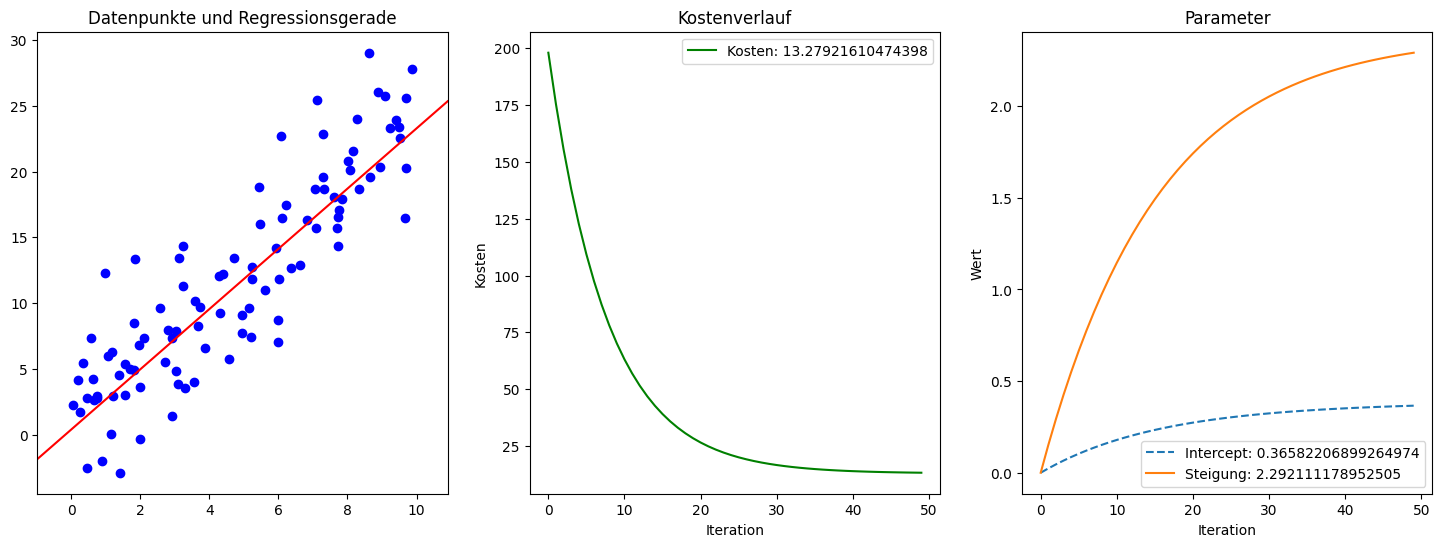

Finale Werte: Intercept = 0.3670366883817282, Coefficient = 2.2982422784939724


In [10]:
learning_rate = 0.001
initial_intercept = 0
initial_coef = 0
num_iterations = 50

intercept, coef, cost_graph = gradient_descent_runner(x, y, initial_intercept, initial_coef, learning_rate, num_iterations, pause_time=0.2)

print(f"Finale Werte: Intercept = {intercept}, Coefficient = {coef}")


#### Aufgabe
1. Erstellt mit Hilfe von `sklearn` ein lineares Regressionsmodell. 
2. Trainiert das Modell mit Hilfe der Testdaten (kein train test split notwendig für diese Aufgabe). Falls ihr einen Fehler bekommt schaut euch die Meldung an, ihr müsst eure Eingabedaten entsprechend aufbereiten. Seht euch die Daten davor und danach an und versucht
 zu erkennen, was sich verändert.
3. Berechnet mit diesen Paramtern und mit Hilfe der Funktion `compute_cost()` die Kosten (den Fehler). Dies soll euch einen Vergleichswert liefern, welche Kosten entstehen bei der optimierten Berechnung durch skitlearn im Vergleich zu unserer Lösung.
4. Versucht eine optimale Lernrate `learning_rate` einzustellen um möglichst schnell an die (gerade eben) berechneten Kosten heran zu kommen.
5. _Zusatzaufgabe_: Überlegt euch eine Abbruchbedingung und baut diese in den Code ein. Das Verfahren soll beendet werden wenn sich keine aussreichend große Kostenminimierung mehr ergibt (ab wann das der Fall ist bleibt euch überlassen).